In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)


In [2]:
data = pd.read_csv('/content/drive/MyDrive/Tech I.S/csv files/SeoulBikeData.csv')
print("Dimension of data dataset", data.shape)

Dimension of data dataset (8760, 14)


In [3]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
from datetime import datetime
data.Date=pd.to_datetime(data.Date)

In [5]:
data["Month"]=pd.DatetimeIndex(data["Date"]).month
data["year"]=pd.DatetimeIndex(data["Date"]).year
data["day"]=pd.DatetimeIndex(data["Date"]).day

In [6]:
# Extracting dataframe for only 'number' datatypes

df = data.select_dtypes(include=['float64','int64'])
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,year,day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,2017,12
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,2017,12
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,2017,12
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,2017,12
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,2017,12


In [7]:
# Showing datatypes of the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         8760 non-null   int64  
 1   Hour                      8760 non-null   int64  
 2   Temperature(C)            8760 non-null   float64
 3   Humidity(%)               8760 non-null   int64  
 4   Wind speed (m/s)          8760 non-null   float64
 5   Visibility (10m)          8760 non-null   int64  
 6   Dew point temperature(C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)   8760 non-null   float64
 8   Rainfall(mm)              8760 non-null   float64
 9   Snowfall (cm)             8760 non-null   float64
 10  Month                     8760 non-null   int64  
 11  year                      8760 non-null   int64  
 12  day                       8760 non-null   int64  
dtypes: float64(6), int64(7)
memory usage: 889.8 KB


In [8]:
# Getting discriptive statistics on datatypes

df.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,year,day
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,6.526027,2017.915068,15.720548
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,3.448048,0.278796,8.796749
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,2017.000000,1.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,4.000000,2018.000000,8.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,7.000000,2018.000000,16.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,10.000000,2018.000000,23.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,12.000000,2018.000000,31.000000


###Identifying Missing Values

In [9]:
miss_val = df.isna().sum()
miss_val

Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Month                       0
year                        0
day                         0
dtype: int64

###Identifying missing values > 0 and sorting them by order

In [10]:
miss_val[miss_val>0].sort_values(ascending = False)

Series([], dtype: int64)

No missing values are found in the data

### Constructing Correlation Matrix

In [11]:
corr = df.corr()
corr

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,year,day
Rented Bike Count,1.000000,4.102573e-01,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804,7.086107e-02,2.151618e-01,4.684885e-02
Hour,0.410257,1.000000e+00,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516,1.036729e-15,2.336763e-14,4.206322e-16
Temperature(C),0.538558,1.241145e-01,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405,4.968327e-02,3.777958e-01,8.090791e-02
Humidity(%),-0.199780,-2.416438e-01,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183,4.779778e-02,3.592468e-02,7.047359e-03
Wind speed (m/s),0.121108,2.851967e-01,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554,-8.206909e-02,-3.780878e-03,-6.123440e-02
Visibility (10m),0.199280,9.875348e-02,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695,7.788783e-02,5.238110e-02,-1.068595e-01
Dew point temperature(C),0.379788,3.054372e-03,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887,6.510073e-02,3.363497e-01,6.970777e-02
Solar Radiation (MJ/m2),0.261837,1.451309e-01,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301,-3.041240e-02,1.280860e-01,-3.445555e-03
Rainfall(mm),-0.123074,8.714642e-03,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500,-2.279368e-02,2.752192e-02,1.199827e-02
Snowfall (cm),-0.141804,-2.151645e-02,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000,5.475846e-02,-2.064178e-01,1.014355e-01


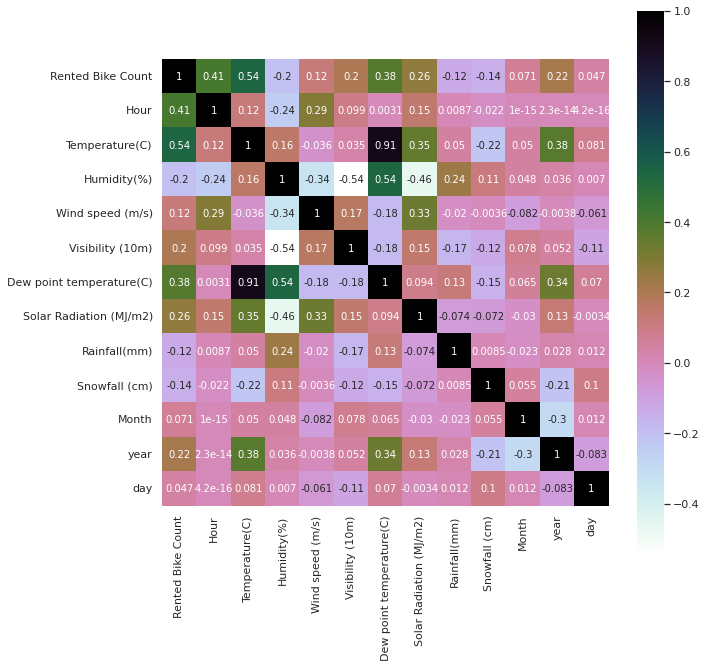

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='cubehelix_r',square=True)
plt.show()

## Checking for the Outliers

In [13]:
cols=df.columns

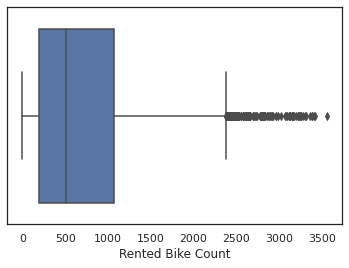

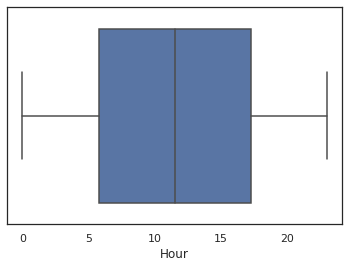

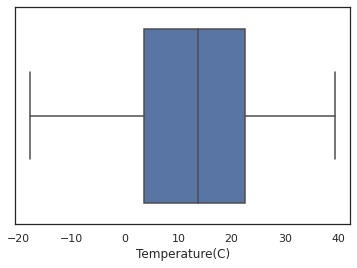

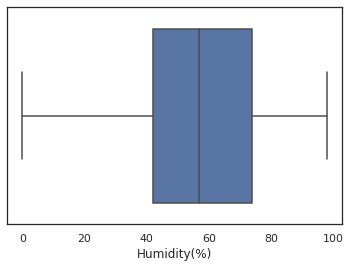

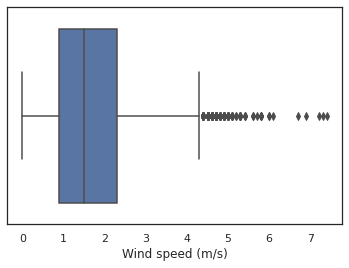

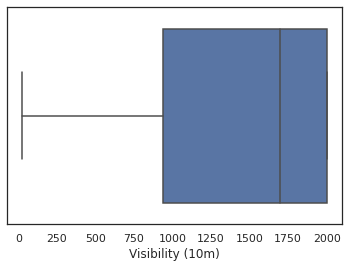

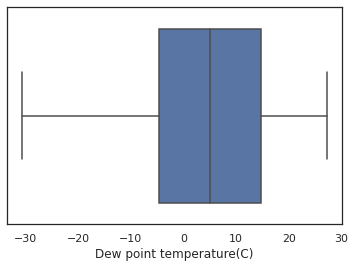

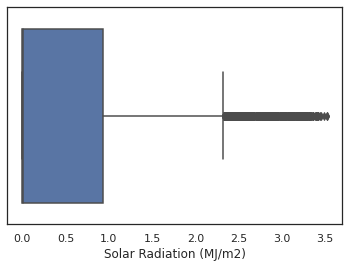

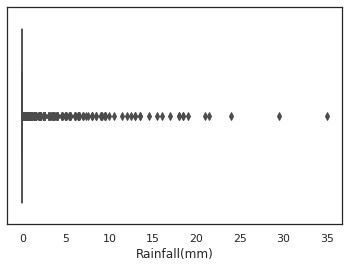

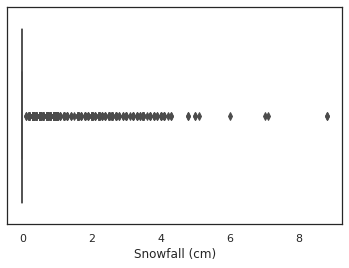

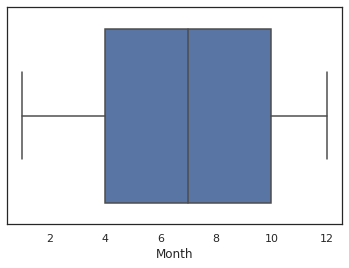

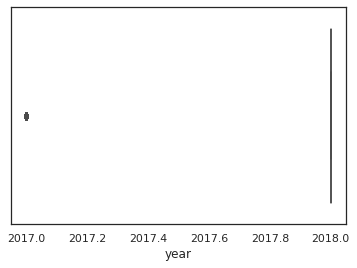

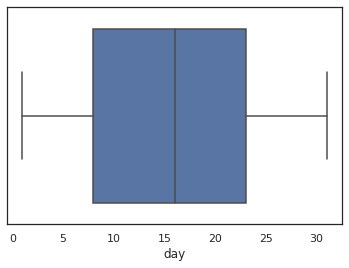

In [14]:
# Plotting box plot

for col in cols:
  sns.boxplot(df[col])
  plt.show()

#Dealing with the Outliers

In [15]:

Q1=np.percentile(df["Wind speed (m/s)"],25,interpolation="midpoint")
Q3=np.percentile(df["Wind speed (m/s)"],75,interpolation="midpoint")
IQR=Q3-Q1
up_limit=Q3+1.5*IQR 
low_limit=Q1-1.5*IQR
print("Upper Limit:",up_limit)
print("Low Limit:", low_limit)

Upper Limit: 4.3999999999999995
Low Limit: -1.1999999999999997


In [16]:
df= df[df["Wind speed (m/s)"]<up_limit]    #applying the condition to 'df' to remove values of the outliers
df= df[df["Wind speed (m/s)"]>low_limit]   #applying the condition to 'df' to remove values of the outliers

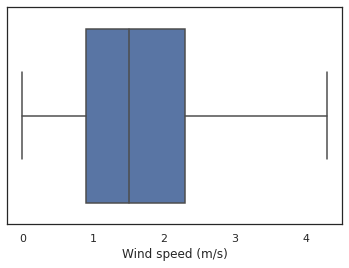

In [17]:
sns.boxplot(df['Wind speed (m/s)'])

In [18]:
Q1 = np.percentile(df["Solar Radiation (MJ/m2)"],25,interpolation="midpoint")
Q3 = np.percentile(df['Solar Radiation (MJ/m2)'],75,interpolation="midpoint")
IQR = Q3-Q1
up_limit = Q3+1.5*IQR
low_limit = Q1-1.5*IQR
print("Upper Limit:",up_limit)
print("Low Limit:", low_limit)

Upper Limit: 2.25
Low Limit: -1.35


In [19]:
df = df[df['Solar Radiation (MJ/m2)']<up_limit]    #applying the condition to 'df' to remove values of the outliers
df = df[df['Solar Radiation (MJ/m2)']<up_limit]    #applying the condition to 'df' to remove values of the outliers

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7908 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         7908 non-null   int64  
 1   Hour                      7908 non-null   int64  
 2   Temperature(C)            7908 non-null   float64
 3   Humidity(%)               7908 non-null   int64  
 4   Wind speed (m/s)          7908 non-null   float64
 5   Visibility (10m)          7908 non-null   int64  
 6   Dew point temperature(C)  7908 non-null   float64
 7   Solar Radiation (MJ/m2)   7908 non-null   float64
 8   Rainfall(mm)              7908 non-null   float64
 9   Snowfall (cm)             7908 non-null   float64
 10  Month                     7908 non-null   int64  
 11  year                      7908 non-null   int64  
 12  day                       7908 non-null   int64  
dtypes: float64(6), int64(7)
memory usage: 864.9 KB


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8760 non-null   datetime64[ns]
 1   Rented Bike Count         8760 non-null   int64         
 2   Hour                      8760 non-null   int64         
 3   Temperature(C)            8760 non-null   float64       
 4   Humidity(%)               8760 non-null   int64         
 5   Wind speed (m/s)          8760 non-null   float64       
 6   Visibility (10m)          8760 non-null   int64         
 7   Dew point temperature(C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)   8760 non-null   float64       
 9   Rainfall(mm)              8760 non-null   float64       
 10  Snowfall (cm)             8760 non-null   float64       
 11  Seasons                   8760 non-null   object        
 12  Holiday             

## Dealing with the Date data

In [22]:
data.Date #data["Date"] Same Output 

0      2017-01-12
1      2017-01-12
2      2017-01-12
3      2017-01-12
4      2017-01-12
          ...    
8755   2018-11-30
8756   2018-11-30
8757   2018-11-30
8758   2018-11-30
8759   2018-11-30
Name: Date, Length: 8760, dtype: datetime64[ns]

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8760 non-null   datetime64[ns]
 1   Rented Bike Count         8760 non-null   int64         
 2   Hour                      8760 non-null   int64         
 3   Temperature(C)            8760 non-null   float64       
 4   Humidity(%)               8760 non-null   int64         
 5   Wind speed (m/s)          8760 non-null   float64       
 6   Visibility (10m)          8760 non-null   int64         
 7   Dew point temperature(C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)   8760 non-null   float64       
 9   Rainfall(mm)              8760 non-null   float64       
 10  Snowfall (cm)             8760 non-null   float64       
 11  Seasons                   8760 non-null   object        
 12  Holiday             

## Choosing Object values

In [24]:
df_cat=data.select_dtypes(include="object")
df_cat.head()

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes


## Converting categorical values to numerical values

In [25]:
cols1=df_cat.columns
df_cat_final=pd.get_dummies(df_cat,columns=cols1)

In [26]:
df

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,year,day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,2017,12
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,2017,12
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,2017,12
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,2017,12
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,2017,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,11,2018,30
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,11,2018,30
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,11,2018,30
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,11,2018,30


#Categorical to Numerical 
1. Creating Dummies--  Creating New Column for each unique value

2. Label Encoder -- this will assign some value to particular unique categorical value, without creating new columns. 

In [27]:
final_data=pd.concat([df,df_cat_final],axis=1)

In [28]:
final_data=final_data.dropna()

In [29]:
final_data

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),...,year,day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,254.0,0.0,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0,...,2017.0,12.0,0,0,0,1,0,1,0,1
1,204.0,1.0,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0,...,2017.0,12.0,0,0,0,1,0,1,0,1
2,173.0,2.0,-6.0,39.0,1.0,2000.0,-17.7,0.0,0.0,0.0,...,2017.0,12.0,0,0,0,1,0,1,0,1
3,107.0,3.0,-6.2,40.0,0.9,2000.0,-17.6,0.0,0.0,0.0,...,2017.0,12.0,0,0,0,1,0,1,0,1
4,78.0,4.0,-6.0,36.0,2.3,2000.0,-18.6,0.0,0.0,0.0,...,2017.0,12.0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003.0,19.0,4.2,34.0,2.6,1894.0,-10.3,0.0,0.0,0.0,...,2018.0,30.0,1,0,0,0,0,1,0,1
8756,764.0,20.0,3.4,37.0,2.3,2000.0,-9.9,0.0,0.0,0.0,...,2018.0,30.0,1,0,0,0,0,1,0,1
8757,694.0,21.0,2.6,39.0,0.3,1968.0,-9.9,0.0,0.0,0.0,...,2018.0,30.0,1,0,0,0,0,1,0,1
8758,712.0,22.0,2.1,41.0,1.0,1859.0,-9.8,0.0,0.0,0.0,...,2018.0,30.0,1,0,0,0,0,1,0,1


In [30]:
X=final_data.drop(["Rented Bike Count"],axis=1)
y=final_data["Rented Bike Count"]

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5931, 20)
(1977, 20)
(5931,)
(1977,)


In [33]:
from sklearn.linear_model import LinearRegression

ln=LinearRegression()
ln.fit(X_train,y_train)

LinearRegression()

In [34]:
y_pred=ln.predict(X_test)
print(y_pred)

[ 748.35727797 1585.05120266 1102.0549037  ...  913.37204133   74.87446238
  725.61616799]


In [35]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

df_pred = ln.predict(X_test)
print('Mean Absolute Error of linear regression:',mean_absolute_error(df_pred, y_test))
print('Mean Square Error of linear regression:', mean_squared_error(df_pred, y_test))
print('R_Squared Score of linear regression:', r2_score(df_pred, y_test))

Mean Absolute Error of linear regression: 343.0301142663727
Mean Square Error of linear regression: 209345.22065611824
R_Squared Score of linear regression: 0.13967633419033643


In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

accuracy=ln.score(X_test,y_test)
print("Accuracy:",round(accuracy*100,2),"%")

Accuracy: 53.65 %


In [37]:
predic_test = ln.predict(X_test)

In [47]:
#final prediction on test data
predic_test = ln.predict(X_test)

#Create Sample Submission file 
submission_data = pd.DataFrame({'Rented Bike Count':y_test})
submission_data['Predicted_values'] = predic_test

submission_data


,Rented Bike Count,Predicted_values
3196,112.0,748.357278
5589,1731.0,1585.051203
8317,889.0,1102.054904
3810,2142.0,1291.244697
700,86.0,-188.586139
...,...,...
3152,0.0,-495.447592
3939,167.0,219.829014
2393,829.0,913.372041
2136,266.0,74.874462


#Ridge(L2) Regression

In [48]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge

Ridge()

In [54]:
ridge.fit(X_train,y_train)
ridge_score = ridge.score(X_train, y_train)
coeff_used = np.sum(ridge.coef_ !=0)
ridge.coef_

array([ 2.61742563e+01,  1.63284098e+01, -1.15633716e+01,  3.53523926e+01,
        1.61665309e-04,  1.27482301e+01, -5.42751839e+01, -5.86002105e+01,
        2.83936119e+01,  6.40352693e-01, -9.86484097e+01, -1.72565976e+00,
        1.66155712e+02,  1.48205019e+01,  2.50345479e+01, -2.06010762e+02,
       -7.21593173e+01,  7.21593173e+01, -4.67807653e+02,  4.67807653e+02])

In [55]:
print("training score",ridge_score)
print("number of feature used:",coeff_used)

training score 0.5649878891008271
number of feature used: 20


#Lasso(L1) Regression

In [56]:
from sklearn.linear_model import Lasso 
lasso = Lasso()
lasso

Lasso()

In [58]:
lasso.fit(X_train,y_train)
lasso_score = lasso.score(X_train,y_train)
coeff_used = np.sum(lasso.coef_ != 0)
lasso.coef_

array([ 2.62416014e+01,  1.68328584e+01, -1.13067342e+01,  3.25156631e+01,
        3.06872185e-03,  1.25330472e+01, -4.87378838e+01, -5.79513876e+01,
        2.34290069e+01,  2.44403622e+00, -6.22157707e+01, -1.47054029e+00,
        1.34842707e+02, -0.00000000e+00,  0.00000000e+00, -1.98279257e+02,
       -1.24109008e+02,  7.56813448e-14, -9.01125697e+02,  0.00000000e+00])

In [59]:
print("training score",lasso_score)
print("number of feature used:",coeff_used)

training score 0.5646419102710923
number of feature used: 17


The model performance accuracy is 53% which is accepted. 